Predict incomes from the census data set

## Setup libraries

In [19]:
from pathlib import Path
from collections import OrderedDict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling as ppfl

In [20]:
%matplotlib inline
sns.set_style('whitegrid')

## Get data

The file uci_data_set.py is used to retrieve the data

In [21]:
data_root = Path.home() / 'uci_data' / 'adult'
train_data = data_root / 'adult.data'
test_data = data_root / 'adult.test'

assert train_data.exists() and test_data.exists(
), "Use the python script to retrieve the data"

Create a list of column names and types

In [22]:
inputs = OrderedDict(
    (("age",
      ("continuous", )), ("workclass",
                          ("Private", "Self-emp-not-inc", "Self-emp-inc",
                           "Federal-gov", "Local-gov", "?", "State-gov",
                           "Without-pay", "Never-worked")), ("fnlwgt",
                                                             ("continuous", )),
     ("education",
      ("Bachelors", "Some-college", "11th", "HS-grad", "Prof-school",
       "Assoc-acdm", "Assoc-voc", "9th", "7th-8th", "12th", "Masters",
       "1st-4th", "10th", "Doctorate", "5th-6th", "Preschool")),
     ("education-num",
      ("continuous", )), ("marital-status",
                          ("Married-civ-spouse", "Divorced", "Never-married",
                           "Separated", "Widowed", "Married-spouse-absent",
                           "Married-AF-spouse")),
     ("occupation",
      ("Tech-support", "Craft-repair", "Other-service", "Sales",
       "Exec-managerial", "Prof-specialty", "Handlers-cleaners",
       "Machine-op-inspct", "Adm-clerical", "Farming-fishing",
       "Transport-moving", "Priv-house-serv", "Protective-serv",
       "Armed-Forces")), ("relationship",
                          ("Wife", "Own-child", "Husband", "Not-in-family",
                           "Other-relative", "Unmarried")),
     ("race", ("White", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other",
               "Black")), ("sex", ("Female", "Male")), ("capital-gain",
                                                        ("continuous", )),
     ("capital-loss", ("continuous", )), ("hours-per-week", ("continuous", )),
     ("native-country",
      ("United-States", "Cambodia", "England", "Puerto-Rico", "Canada",
       "Germany", "Outlying-US(Guam-USVI-etc)", "India", "Japan", "Greece",
       "South", "China", "Cuba", "Iran", "Honduras", "Philippines", "Italy",
       "Poland", "Jamaica", "Vietnam", "Mexico", "Portugal", "Ireland",
       "France", "Dominican-Republic", "Laos", "Ecuador", "Taiwan", "Haiti",
       "Columbia", "Hungary", "Guatemala", "Nicaragua", "Scotland", "Thailand",
       "Yugoslavia", "El-Salvador", "Trinadad&Tobago", "Peru", "Hong",
       "Holand-Netherlands")), ("income", ("<=50k", ">50k"))))

Create data frames

In [23]:
train_df = pd.read_csv(train_data, names=inputs.keys(), header=None)
test_df = pd.read_csv(test_data, names=inputs.keys(), header=None, skiprows=1)

Drop rows with unknown values marked with ?

In [24]:
train_df = train_df.replace(' ?', np.nan).dropna()
test_df = test_df.replace(' ?', np.nan).dropna()

Get sizes of training and test data sets

In [25]:
train_len = train_df.shape[0]
test_len = test_df.shape[0]
train_len, test_len

(30162, 15060)

Combine train and test datasets

In [26]:
combined_df = pd.concat([train_df, test_df])

Fix different strings for income in train and test data

In [27]:
combined_df['income'] = combined_df.income.apply(
    lambda x: x.strip()).replace(
    to_replace={'<=50K.': '<=50K', '>50K.': '>50K'})

## Analyze data

Find missing data

In [28]:
combined_df.isna().apply(sum)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Get types of data

In [29]:
combined_df.dtypes.value_counts()

object    9
int64     6
dtype: int64

Get the number of unique values for each type

In [30]:
combined_df.select_dtypes('object').apply(lambda x: x.nunique())

workclass          7
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
income             2
dtype: int64

Set feature types

In [31]:
def set_df_types(df):
    return df.astype({
        'workclass': 'category',
        'education': 'category',
        'marital-status': 'category',
        'occupation': 'category',
        'relationship': 'category',
        'race': 'category',
        'sex': 'category',
        'native-country': 'category',
        'income': 'category'
    })


combined_df = set_df_types(combined_df)

## Profile data

In [32]:
# ppfl.ProfileReport(combined_df)

Analyze label to predict

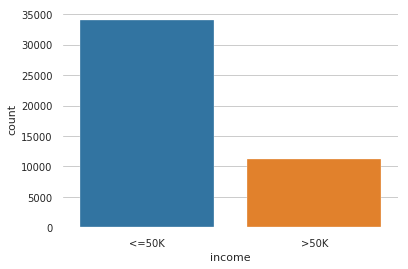

In [33]:
sns.countplot('income', data=combined_df)

Split data into train and test

In [34]:
train_data = combined_df.iloc[:train_len]
test_data = combined_df.iloc[train_len:]

## Analyze categorical data

Get the numeric and categorical columns

In [35]:
kinds = pd.Series(dt.kind for dt in train_data.dtypes)
is_num = kinds != 'O'
is_cat = kinds == 'O'

Display the categorical columns

In [36]:
train_data.columns[is_cat]

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

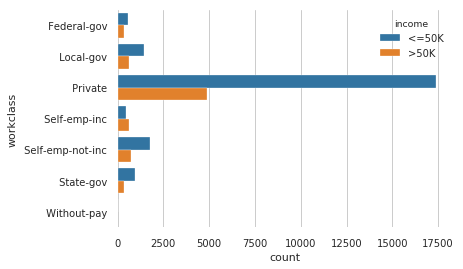

In [37]:
sns.countplot(y='workclass', hue='income', data=train_data)

Plot income by education

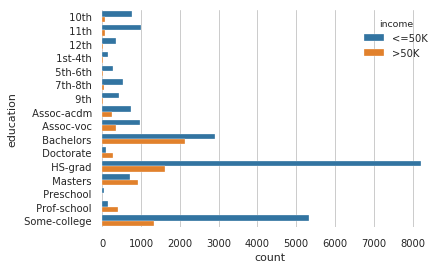

In [38]:
sns.countplot(y='education', hue='income', data=train_data)

Plot income by marital status

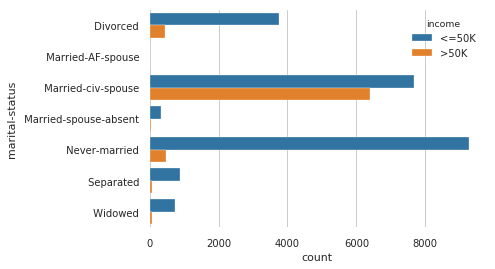

In [39]:
sns.countplot(y='marital-status', hue='income', data=train_data)

Plot income by occupation

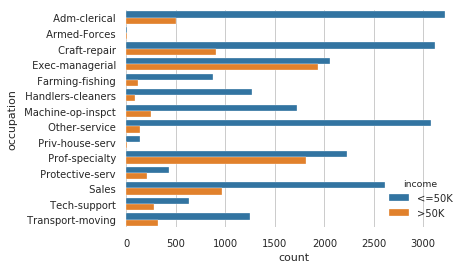

In [40]:
sns.countplot(y='occupation', hue='income', data=train_data)

Plot income by relationship

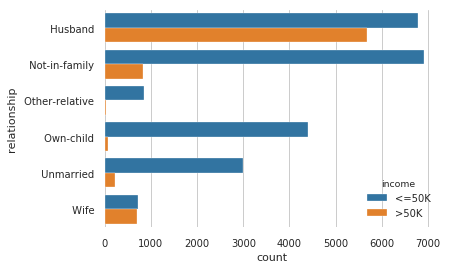

In [41]:
sns.countplot(y='relationship', hue='income', data=train_data)

Plot income by race

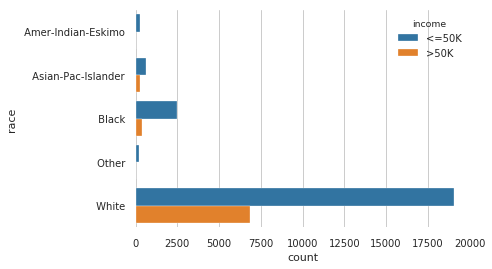

In [42]:
sns.countplot(y='race', hue='income', data=train_data)

Plot income by sex

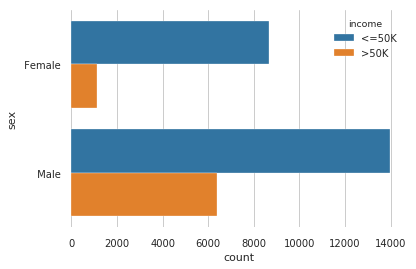

In [43]:
sns.countplot(y='sex', hue='income', data=train_data)

## Analyze numerical data

Display the numerical columns

In [44]:
train_data.columns[is_num]

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

Plot the distribution of ages

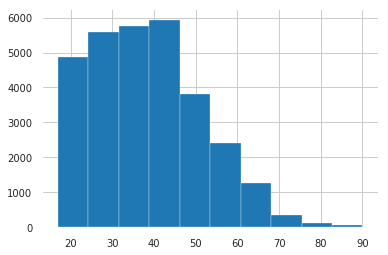

In [45]:
train_data.age.hist()

Plot age by income

(None, None)

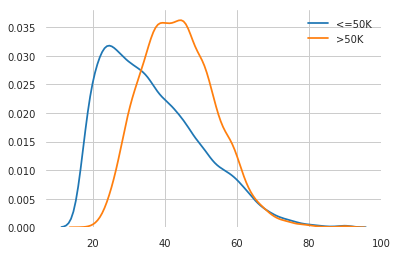

In [46]:
fig, ax = plt.subplots(1, 1)

def kdeplot(label, ax):
    sns.kdeplot(train_data.age[train_data.income == label],
                label=label, ax=ax)

kdeplot('<=50K', ax), kdeplot('>50K', ax)

Plot the distribution of education-num

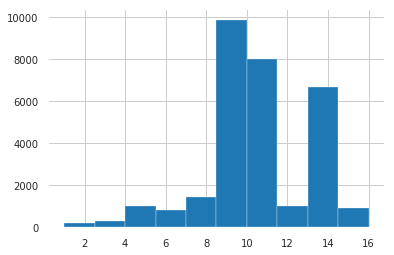

In [47]:
train_data['education-num'].hist()

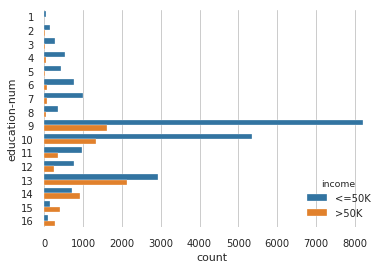

In [48]:
sns.countplot(y='education-num', hue='income', data=train_data);

Plot the distribution of capital-gain

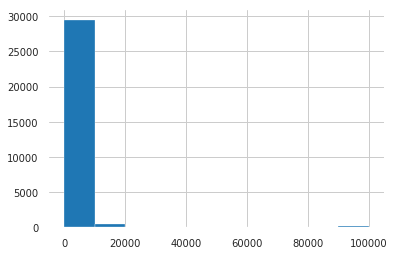

In [49]:
train_data['capital-gain'].hist();

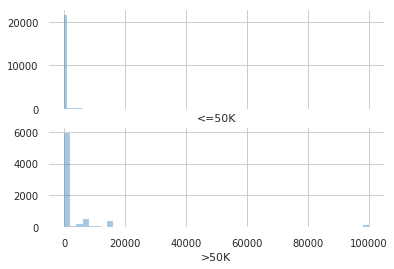

In [50]:
fig, ax = plt.subplots(2, 1, sharex=True)

def distplot(label, ax):
    sns.distplot(
        train_data['capital-gain'][train_data.income == label],
        kde=False, axlabel=label, ax=ax)

distplot('<=50K', ax[0]), distplot('>50K', ax[1]);

Plot the distribution of capital-loss

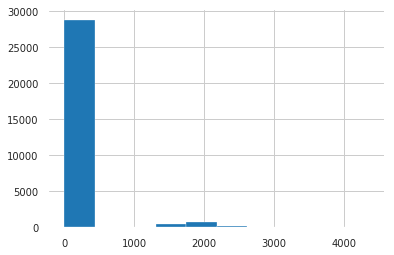

In [51]:
train_data['capital-loss'].hist()

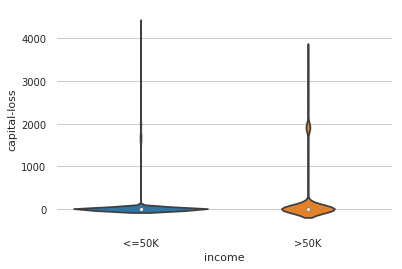

In [67]:
sns.violinplot(x='income', y='capital-loss', data=train_data)

## Plot correlations across variables

In [65]:
num_cols = train_data.columns[is_num]
corr = train_data[num_cols].corr()
corr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours-per-week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


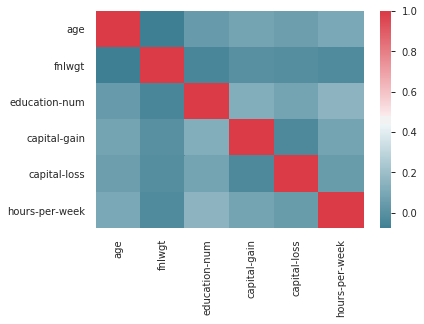

In [66]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap);